<a href="https://colab.research.google.com/github/EraOfCoding/Noise-suppression-model/blob/main/basic_audio_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
samples_num = 100000
elements_num = 1
elements_interval = 0.01
elements_total_num = int(elements_num / elements_interval)
starting_point = int(0 - 0.5*elements_total_num)
visualize_samples_num = 1

In [ ]:
samples = []
xs = []
ys = []

for i in range(0, samples_num):

  for j in range(starting_point, elements_total_num):
    x_val = j * elements_interval
    y_val = x_val * x_val

    xs.append(x_val)
    ys.append(y_val)

  samples.append((xs, ys))

  xs = []
  ys = []

In [ ]:
x_pure, y_pure = np.array(samples)[:, 0], np.array(samples)[:, 1]

In [ ]:
noise_factor = 0.05
noisy_samples = []
for i in range(0, len(x_pure)):
  pure = np.array(y_pure[i])
  noise = np.random.normal(0, 1, pure.shape)
  signal = pure + noise_factor * noise
  noisy_samples.append([x_pure[i], signal])

In [ ]:
x_noisy, y_noisy = np.array(noisy_samples)[:, 0], np.array(noisy_samples)[:, 1]

In [ ]:
import math

bath_size = 150
no_epochs = 5
train_test_split = 0.3
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0

In [ ]:
y_val_noisy_r = []
y_val_pure_r = []

for i in range(0, len(y_noisy)):
  noisy_sample = y_noisy[i]
  pure_sample = y_pure[i]
  noisy_sample = (noisy_sample - np.min(noisy_sample)) / (np.max(noisy_sample) - np.min(noisy_sample))
  pure_sample = (pure_sample - np.min(pure_sample)) / (np.max(pure_sample) - np.min(pure_sample))
  y_val_noisy_r.append(noisy_sample)
  y_val_pure_r.append(pure_sample)

y_val_noisy_r = np.array(y_val_noisy_r)
y_val_pure_r = np.array(y_val_pure_r)
print(y_val_noisy_r.shape)
noisy_input = y_val_noisy_r.reshape((y_val_noisy_r.shape[0], y_val_noisy_r.shape[1], 1))
pure_input = y_val_pure_r.reshape((y_val_pure_r.shape[0], y_val_pure_r.shape[1], 1)) 

percentage_training = math.floor((1 - train_test_split) * len(noisy_input))
noisy_input, noisy_input_test = noisy_input[:percentage_training], noisy_input[percentage_training:]
pure_input, pure_input_test = pure_input[:percentage_training], pure_input[percentage_training:]


(100000, 150)


In [ ]:
print(noisy_input.shape)

(70000, 150, 1)


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu', input_shape=(150, 1)))
model.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Conv1DTranspose(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Conv1DTranspose(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Conv1D(1, kernel_size=3, activation="sigmoid", padding="same"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 148, 128)          512       
                                                                 
 conv1d_4 (Conv1D)           (None, 146, 32)           12320     
                                                                 
 conv1d_transpose_2 (Conv1DT  (None, 148, 32)          3104      
 ranspose)                                                       
                                                                 
 conv1d_transpose_3 (Conv1DT  (None, 150, 128)         12416     
 ranspose)                                                       
                                                                 
 conv1d_5 (Conv1D)           (None, 150, 1)            385       
                                                                 
Total params: 28,737
Trainable params: 28,737
Non-trai

In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy')

Epoch 1/500
374/374 [==============================] - 5s 11ms/step - loss: 0.3595 - val_loss: 0.3594
Epoch 2/500
374/374 [==============================] - 4s 10ms/step - loss: 0.3595 - val_loss: 0.3595
Epoch 3/500
374/374 [==============================] - 4s 10ms/step - loss: 0.3595 - val_loss: 0.3595
Epoch 4/500
374/374 [==============================] - 4s 11ms/step - loss: 0.3595 - val_loss: 0.3594
Epoch 5/500
374/374 [==============================] - 4s 10ms/step - loss: 0.3595 - val_loss: 0.3594
Epoch 6/500
374/374 [==============================] - 4s 10ms/step - loss: 0.3595 - val_loss: 0.3595
Epoch 7/500
374/374 [==============================] - 4s 11ms/step - loss: 0.3595 - val_loss: 0.3595
Epoch 8/500
374/374 [==============================] - 4s 10ms/step - loss: 0.3595 - val_loss: 0.3595
Epoch 9/500
374/374 [==============================] - 4s 10ms/step - loss: 0.3595 - val_loss: 0.3594
Epoch 10/500
374/374 [==============================] - 4s 10ms/step - loss: 0.359

In [ ]:
model = tf.keras.models.load_model("soundFilteringModel.h5")

In [ ]:
model.evaluate(noisy_input_test, pure_input_test)

938/938 [==============================] - 14s 5ms/step - loss: 0.3595


0.3594568371772766

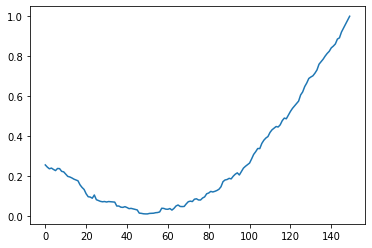

In [ ]:
samples = noisy_input_test[:100]
pures = pure_input_test[:100]
reconstructions = model.predict(noisy_input)
plt.plot(np.array(reconstructions[99]))
plt.show()

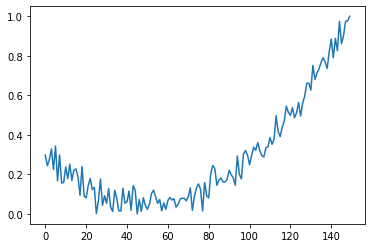

In [ ]:
plt.plot(samples[99])

In [ ]:
model.save("soundFilteringModel.h5")